## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras
import itertools

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
from keras.regularizers import l1_l2

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=0.0, l2_ratio=0.0):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation='relu', 
                                   name='hidden_layer'+str(i+1), 
                                   kernel_regularizer = l1_l2(l1=l1_ratio, l2=l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units,
                                   activation='relu',
                                   name='hidden_layer'+str(i+1), 
                                   kernel_regularizer = l1_l2(l1=l1_ratio, l2=l2_ratio))(x)
            
    out = keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [9]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12, 0.0]
L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12, 0.0]

In [10]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for l1r, l2r in itertools.product(L1_EXP, L2_EXP):
    keras.backend.clear_session()
    print("Experiment with L1 = %.6f, L2 = %.6f" % (l1r, l2r))
    model = build_mlp(x_train.shape[1:], l1_ratio=l1r, l2_ratio=l2r)
    model.summary()
    
    opt = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)
    
    model.fit(x_train, y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_test, y_test),
              shuffle=True)
    
    #Collect results
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['accuracy']
    valid_acc = model.history.history['val_accuracy']
    
    exp_name_tag = "exp-l1-%s-l2-%s" % (str(l1r), str(l2r))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with L1 = 0.010000, L2 = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/500

50000/50000 [==============================] - 13s 268us/step - loss: 2.4614 - accuracy: 0.0969 - val_loss: 2.4613 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 13s 265us/step - loss: 2.4614 - accuracy: 0.0985 - val_loss: 2.4614 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 13s 269us/step - loss: 2.4614 - accuracy: 0.0988 - val_loss: 2.4614 - val_accuracy: 0.1000
Experiment with L1 = 0.010000, L2 = 0.000100
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
______________________________________

50000/50000 [==============================] - 12s 241us/step - loss: 2.4626 - accuracy: 0.0988 - val_loss: 2.4625 - val_accuracy: 0.1000
Epoch 46/50
50000/50000 [==============================] - 12s 241us/step - loss: 2.4626 - accuracy: 0.0970 - val_loss: 2.4623 - val_accuracy: 0.1000
Epoch 47/50
50000/50000 [==============================] - 13s 256us/step - loss: 2.4626 - accuracy: 0.0987 - val_loss: 2.4624 - val_accuracy: 0.1000
Epoch 48/50
50000/50000 [==============================] - 12s 246us/step - loss: 2.4626 - accuracy: 0.0985 - val_loss: 2.4624 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 13s 264us/step - loss: 2.4626 - accuracy: 0.0974 - val_loss: 2.4625 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 12s 247us/step - loss: 2.4626 - accuracy: 0.0997 - val_loss: 2.4624 - val_accuracy: 0.1000
Experiment with L1 = 0.010000, L2 = 0.000000
Model: "model_1"
__________________________________________________

50000/50000 [==============================] - 13s 257us/step - loss: 2.4626 - accuracy: 0.0979 - val_loss: 2.4627 - val_accuracy: 0.1000
Epoch 43/50
50000/50000 [==============================] - 13s 262us/step - loss: 2.4626 - accuracy: 0.0977 - val_loss: 2.4626 - val_accuracy: 0.1000
Epoch 44/50
50000/50000 [==============================] - 13s 253us/step - loss: 2.4626 - accuracy: 0.0972 - val_loss: 2.4626 - val_accuracy: 0.1000
Epoch 45/50
50000/50000 [==============================] - 13s 253us/step - loss: 2.4626 - accuracy: 0.0943 - val_loss: 2.4627 - val_accuracy: 0.1000: 2 - ETA: 4s - loss: 2.4 - ETA: 3s - loss: 2.4626 - accura - ETA: 3s - loss: 2.462 - ETA: 2s - loss: 2 - ETA: 2s - loss: 2.4626 - accuracy: 0. - ETA - ETA: 
Epoch 46/50
50000/50000 [==============================] - 13s 260us/step - loss: 2.4626 - accuracy: 0.0987 - val_loss: 2.4626 - val_accuracy: 0.1000
Epoch 47/50
50000/50000 [==============================] - 13s 253us/step - loss: 2.4626 - accuracy: 0.09

50000/50000 [==============================] - 13s 255us/step - loss: 2.4626 - accuracy: 0.0969 - val_loss: 2.4625 - val_accuracy: 0.1000
Epoch 39/50
50000/50000 [==============================] - 13s 253us/step - loss: 2.4626 - accuracy: 0.0995 - val_loss: 2.4624 - val_accuracy: 0.1000
Epoch 40/50
50000/50000 [==============================] - 13s 269us/step - loss: 2.4626 - accuracy: 0.0991 - val_loss: 2.4625 - val_accuracy: 0.1000
Epoch 41/50
50000/50000 [==============================] - 14s 275us/step - loss: 2.4626 - accuracy: 0.0963 - val_loss: 2.4625 - val_accuracy: 0.1000
Epoch 42/50
50000/50000 [==============================] - 13s 263us/step - loss: 2.4626 - accuracy: 0.0971 - val_loss: 2.4623 - val_accuracy: 0.1000
Epoch 43/50
50000/50000 [==============================] - 13s 264us/step - loss: 2.4626 - accuracy: 0.0975 - val_loss: 2.4625 - val_accuracy: 0.1000
Epoch 44/50
50000/50000 [==============================] - 13s 253us/step - loss: 2.4626 - accuracy: 0.0983 - va

50000/50000 [==============================] - 12s 239us/step - loss: 2.4626 - accuracy: 0.0963 - val_loss: 2.4625 - val_accuracy: 0.1000
Epoch 36/50
50000/50000 [==============================] - 12s 232us/step - loss: 2.4626 - accuracy: 0.0970 - val_loss: 2.4626 - val_accuracy: 0.1000
Epoch 37/50
50000/50000 [==============================] - 12s 235us/step - loss: 2.4626 - accuracy: 0.0978 - val_loss: 2.4625 - val_accuracy: 0.1000
Epoch 38/50
50000/50000 [==============================] - 12s 235us/step - loss: 2.4626 - accuracy: 0.0978 - val_loss: 2.4625 - val_accuracy: 0.1000
Epoch 39/50
50000/50000 [==============================] - 12s 232us/step - loss: 2.4626 - accuracy: 0.0973 - val_loss: 2.4625 - val_accuracy: 0.1000
Epoch 40/50
50000/50000 [==============================] - 12s 237us/step - loss: 2.4626 - accuracy: 0.0963 - val_loss: 2.4625 - val_accuracy: 0.1000
Epoch 41/50
50000/50000 [==============================] - 12s 232us/step - loss: 2.4626 - accuracy: 0.0961 - va

50000/50000 [==============================] - 14s 274us/step - loss: 1.8597 - accuracy: 0.4631 - val_loss: 1.8664 - val_accuracy: 0.4594
Epoch 33/50
50000/50000 [==============================] - 14s 271us/step - loss: 1.8458 - accuracy: 0.4648 - val_loss: 1.8851 - val_accuracy: 0.4366
Epoch 34/50
50000/50000 [==============================] - 13s 270us/step - loss: 1.7661 - accuracy: 0.4775 - val_loss: 1.7836 - val_accuracy: 0.4724
Epoch 46/50
50000/50000 [==============================] - 14s 273us/step - loss: 1.7608 - accuracy: 0.4773 - val_loss: 1.7802 - val_accuracy: 0.4726
Epoch 47/50
50000/50000 [==============================] - 14s 284us/step - loss: 1.7563 - accuracy: 0.4794 - val_loss: 1.8296 - val_accuracy: 0.4421
Epoch 48/50
50000/50000 [==============================] - 14s 276us/step - loss: 1.7547 - accuracy: 0.4801 - val_loss: 1.7777 - val_accuracy: 0.4737
Epoch 49/50
50000/50000 [==============================] - 14s 277us/step - loss: 1.7516 - accuracy: 0.4796 - va

50000/50000 [==============================] - 12s 243us/step - loss: 3.3827 - accuracy: 0.5930 - val_loss: 3.5704 - val_accuracy: 0.5212
Epoch 34/50
50000/50000 [==============================] - 12s 245us/step - loss: 3.3324 - accuracy: 0.5950 - val_loss: 3.5017 - val_accuracy: 0.5273
Epoch 35/50
50000/50000 [==============================] - 12s 243us/step - loss: 3.2832 - accuracy: 0.5973 - val_loss: 3.4792 - val_accuracy: 0.5207
Epoch 36/50
50000/50000 [==============================] - 12s 243us/step - loss: 3.2325 - accuracy: 0.5991 - val_loss: 3.4123 - val_accuracy: 0.5223
Epoch 37/50
50000/50000 [==============================] - 12s 247us/step - loss: 3.1797 - accuracy: 0.6035 - val_loss: 3.3806 - val_accuracy: 0.5283
Epoch 38/50
50000/50000 [==============================] - 12s 244us/step - loss: 3.1332 - accuracy: 0.6056 - val_loss: 3.3324 - val_accuracy: 0.5356
Epoch 39/50
50000/50000 [==============================] - 14s 277us/step - loss: 4.0469 - accuracy: 0.4517 - va

50000/50000 [==============================] - 14s 275us/step - loss: 1.3557 - accuracy: 0.5728 - val_loss: 1.5191 - val_accuracy: 0.5063
Epoch 24/50
50000/50000 [==============================] - 14s 277us/step - loss: 1.3416 - accuracy: 0.5791 - val_loss: 1.5175 - val_accuracy: 0.5067
Epoch 25/50
50000/50000 [==============================] - 14s 281us/step - loss: 1.3277 - accuracy: 0.5817 - val_loss: 1.4900 - val_accuracy: 0.5229
Epoch 26/50
50000/50000 [==============================] - 14s 278us/step - loss: 1.3137 - accuracy: 0.5878 - val_loss: 1.4857 - val_accuracy: 0.5238
Epoch 27/50
50000/50000 [==============================] - 14s 283us/step - loss: 1.3002 - accuracy: 0.5908 - val_loss: 1.5075 - val_accuracy: 0.5191
Epoch 28/50
50000/50000 [==============================] - 14s 282us/step - loss: 1.2867 - accuracy: 0.5986 - val_loss: 1.4902 - val_accuracy: 0.5248
Epoch 29/50
50000/50000 [==============================] - 14s 286us/step - loss: 1.2728 - accuracy: 0.6019 - va

50000/50000 [==============================] - 14s 289us/step - loss: 1.2634 - accuracy: 0.5542 - val_loss: 1.4175 - val_accuracy: 0.4939
Epoch 21/50
50000/50000 [==============================] - 13s 256us/step - loss: 1.2482 - accuracy: 0.5608 - val_loss: 1.3892 - val_accuracy: 0.5011
Epoch 22/50
50000/50000 [==============================] - 13s 258us/step - loss: 1.2309 - accuracy: 0.5678 - val_loss: 1.4240 - val_accuracy: 0.4990
Epoch 23/50
50000/50000 [==============================] - 12s 246us/step - loss: 1.2160 - accuracy: 0.5710 - val_loss: 1.3816 - val_accuracy: 0.5178
Epoch 24/50
50000/50000 [==============================] - 13s 259us/step - loss: 1.2004 - accuracy: 0.5751 - val_loss: 1.3749 - val_accuracy: 0.5148
Epoch 25/50
50000/50000 [==============================] - 12s 245us/step - loss: 1.1859 - accuracy: 0.5817 - val_loss: 1.3474 - val_accuracy: 0.5269
Epoch 26/50
50000/50000 [==============================] - 13s 255us/step - loss: 1.1697 - accuracy: 0.5914 - va

50000/50000 [==============================] - 13s 261us/step - loss: 1.3321 - accuracy: 0.5323 - val_loss: 1.4090 - val_accuracy: 0.5032
Epoch 17/50
50000/50000 [==============================] - 13s 268us/step - loss: 1.3137 - accuracy: 0.5397 - val_loss: 1.3951 - val_accuracy: 0.5135
Epoch 18/50
50000/50000 [==============================] - 13s 266us/step - loss: 1.2959 - accuracy: 0.5434 - val_loss: 1.3933 - val_accuracy: 0.5077
Epoch 19/50
50000/50000 [==============================] - 13s 257us/step - loss: 1.2787 - accuracy: 0.5502 - val_loss: 1.3967 - val_accuracy: 0.5015
Epoch 20/50
50000/50000 [==============================] - 13s 270us/step - loss: 1.2650 - accuracy: 0.5529 - val_loss: 1.3730 - val_accuracy: 0.5132
Epoch 21/50
50000/50000 [==============================] - 13s 266us/step - loss: 1.2473 - accuracy: 0.5609 - val_loss: 1.3685 - val_accuracy: 0.5141
Epoch 22/50
50000/50000 [==============================] - 14s 290us/step - loss: 1.2308 - accuracy: 0.5665 - va

50000/50000 [==============================] - 12s 234us/step - loss: 1.4102 - accuracy: 0.5071 - val_loss: 1.4644 - val_accuracy: 0.4809
Epoch 13/50
50000/50000 [==============================] - 12s 231us/step - loss: 1.3886 - accuracy: 0.5136 - val_loss: 1.4312 - val_accuracy: 0.4959
Epoch 14/50
50000/50000 [==============================] - 12s 233us/step - loss: 1.3696 - accuracy: 0.5189 - val_loss: 1.4582 - val_accuracy: 0.4865
Epoch 15/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.3500 - accuracy: 0.5273 - val_loss: 1.4284 - val_accuracy: 0.4900
Epoch 16/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.3309 - accuracy: 0.5337 - val_loss: 1.4048 - val_accuracy: 0.5001
Epoch 17/50
50000/50000 [==============================] - 12s 232us/step - loss: 1.3139 - accuracy: 0.5383 - val_loss: 1.3947 - val_accuracy: 0.5077
Epoch 18/50
50000/50000 [==============================] - 11s 226us/step - loss: 1.2971 - accuracy: 0.5451 - va

50000/50000 [==============================] - 13s 263us/step - loss: 5.4606 - accuracy: 0.4293 - val_loss: 5.1722 - val_accuracy: 0.4338
Epoch 10/50
50000/50000 [==============================] - 13s 269us/step - loss: 4.9167 - accuracy: 0.4333 - val_loss: 4.6746 - val_accuracy: 0.4362
Epoch 11/50
50000/50000 [==============================] - 14s 277us/step - loss: 4.4522 - accuracy: 0.4391 - val_loss: 4.2481 - val_accuracy: 0.4388
Epoch 12/50
50000/50000 [==============================] - 14s 277us/step - loss: 4.0537 - accuracy: 0.4438 - val_loss: 3.8871 - val_accuracy: 0.4397
Epoch 13/50
50000/50000 [==============================] - 14s 282us/step - loss: 3.7138 - accuracy: 0.4470 - val_loss: 3.5658 - val_accuracy: 0.4496
Epoch 14/50
50000/50000 [==============================] - 13s 264us/step - loss: 3.4215 - accuracy: 0.4511 - val_loss: 3.3001 - val_accuracy: 0.4482
Epoch 15/50
50000/50000 [==============================] - 13s 256us/step - loss: 3.1707 - accuracy: 0.4543 - va

50000/50000 [==============================] - 13s 261us/step - loss: 1.7194 - accuracy: 0.4444 - val_loss: 1.7387 - val_accuracy: 0.4294
Epoch 7/50
50000/50000 [==============================] - 13s 263us/step - loss: 1.6866 - accuracy: 0.4561 - val_loss: 1.6995 - val_accuracy: 0.4482
Epoch 8/50
50000/50000 [==============================] - 13s 267us/step - loss: 1.6565 - accuracy: 0.4684 - val_loss: 1.6773 - val_accuracy: 0.4515
Epoch 9/50
50000/50000 [==============================] - 13s 263us/step - loss: 1.6281 - accuracy: 0.4791 - val_loss: 1.6457 - val_accuracy: 0.4702
Epoch 10/50
50000/50000 [==============================] - 13s 264us/step - loss: 1.6035 - accuracy: 0.4862 - val_loss: 1.6471 - val_accuracy: 0.4689- l
Epoch 11/50
50000/50000 [==============================] - 13s 264us/step - loss: 1.5803 - accuracy: 0.4936 - val_loss: 1.6256 - val_accuracy: 0.4767
Epoch 12/50
50000/50000 [==============================] - 14s 284us/step - loss: 1.5556 - accuracy: 0.5006 - va

Epoch 46/50
50000/50000 [==============================] - 14s 281us/step - loss: 0.9181 - accuracy: 0.6767 - val_loss: 1.3602 - val_accuracy: 0.5437
Epoch 47/50
50000/50000 [==============================] - 14s 278us/step - loss: 0.9039 - accuracy: 0.6835 - val_loss: 1.4141 - val_accuracy: 0.5282
Epoch 48/50
50000/50000 [==============================] - 15s 296us/step - loss: 0.8870 - accuracy: 0.6882 - val_loss: 1.3633 - val_accuracy: 0.5344
Epoch 49/50
50000/50000 [==============================] - 14s 275us/step - loss: 0.8752 - accuracy: 0.6917 - val_loss: 1.3528 - val_accuracy: 0.5470
Epoch 50/50
50000/50000 [==============================] - 14s 280us/step - loss: 0.8661 - accuracy: 0.6944 - val_loss: 1.5406 - val_accuracy: 0.5036
Experiment with L1 = 0.000000, L2 = 0.000000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0

50000/50000 [==============================] - 12s 245us/step - loss: 1.3981 - accuracy: 0.5085 - val_loss: 1.4434 - val_accuracy: 0.4857
Epoch 14/50
50000/50000 [==============================] - 12s 242us/step - loss: 1.3765 - accuracy: 0.5167 - val_loss: 1.4704 - val_accuracy: 0.4775
Epoch 15/50
50000/50000 [==============================] - 12s 245us/step - loss: 1.3587 - accuracy: 0.5207 - val_loss: 1.4286 - val_accuracy: 0.4934
Epoch 16/50
50000/50000 [==============================] - 12s 242us/step - loss: 1.3402 - accuracy: 0.5281 - val_loss: 1.4284 - val_accuracy: 0.4933loss:
Epoch 17/50
50000/50000 [==============================] - 12s 242us/step - loss: 1.3199 - accuracy: 0.5350 - val_loss: 1.4051 - val_accuracy: 0.5009
Epoch 18/50
38144/50000 [=====================>........] - ETA: 2s - loss: 1.3059 - accuracy: 0.5409Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 259us/step - loss: 2.0510 - accuracy: 0.2654 

50000/50000 [==============================] - 11s 227us/step - loss: 0.8787 - accuracy: 0.6906 - val_loss: 1.4611 - val_accuracy: 0.5174


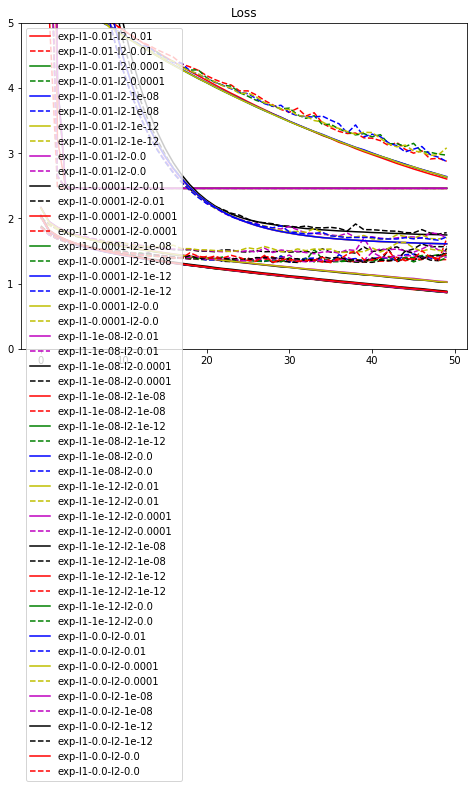

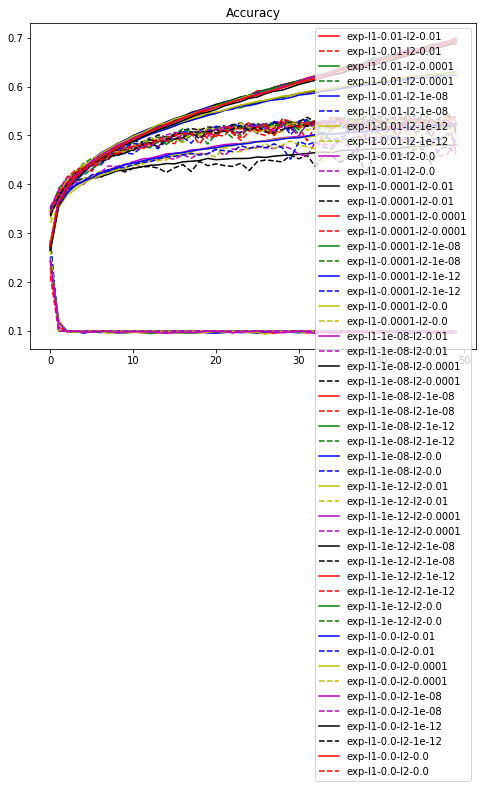

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i%6])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i%6])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i%6])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i%6])
plt.title("Accuracy")
plt.legend()
plt.show()